<div style='text-align: center;'>
<span style="color:#000000; font-family: 'Garamond'; font-weight: 700; font-size: 2em;"> Analysis and use of different types of classification algorithms for handwritten number recognition </span>
</div>

<p><b> December 4th, 2022</b></p>  

------------------------------------------------------------------------------------------------------------------------------


<div style='text-align: center;'>
<span style="color:#000000; font-family: 'Times new roman'; font-weight: 700; font-size: 2em;"> 1. Loading data & implementation of functions </span>
</div>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random 

# Cargamos los datos para el entrenamiento y prueba(test), mismos que están en diferentes datasets

train = np.genfromtxt('DigitsTraining.csv', delimiter=',')
test = np.genfromtxt('DigitsTesting.csv', delimiter=',')

# Preprocesamiento de los datos (Pre-processing data)
# separamos los datos de las etiquetas para cada dataset

X_train = train[:, 1:]
y_train = train[:, 0]
X_test = test[:, 1:]
y_test = test[:, 0]

# Algunas funciones
# Funcion que devuelve la recta y = ax + b
# a y b se consiguen partir de w[0]+w[1]x1+w[2]X2=0

    
def line(w, data=None):
    a = - w[1] / w[2]
    b = - w[0] / w[2]
    x_line = np.linspace(0.4, 1, 100)
    if data is not None:
        return a*data + b
    else:
        return a*x_line + b
# Función que calcula la simetria promedio de una imagen

def symmetry(X):
    X_shapes = (16, 16)
    X = X.reshape(X_shapes)
   
    #creamos 2 nuevas matrices, que son las versiones de la matriz rotadas horizontal y verticalmente
    image_FlipV=np.flip(X,axis=1)
    image_FlipH=np.flip(X,axis=0)
    # en base a la formula de la simetria promedio vertical y horizontal, calculamos Sv y Sh
    Sv=((np.abs(X-image_FlipV)).sum())/256
    Sh=((np.abs(X-image_FlipH)).sum())/256
    # La simetria promedio total es el promedio del valor de la simetria horizontal y vertical
    symm=(Sv+Sh)/2


    return symm

# Función que calcula la intensidad promedio de una imagen, average intensity

def intensity(X):
    X_shapes = (16, 16)
    X = X.reshape(X_shapes)
    AVG_intencity=(X.sum())/256
    return AVG_intencity



In [ ]:
# Informacion de los datos de entrenamiento
print("Número de imagenes:"+ str(X_train.shape[0]))
print("Número de caracteristicas:"+ str(X_train.shape[1]))

# Informacion de los datos de prueba/test
print("Número de imagenes:"+ str(X_test.shape[0]))
print("Número de caracteristicas:"+ str(X_test.shape[1]))


In [2]:
# Preparando los datos del set de entrenamiento
# Se segmentaran los datos, a solo aquellos que pertenezcan a los 2 digitos que se emplearan
# Como mi CI termina en 5 (CI: 6775715 LP) el primer digito será 5, el segundo será 
# por combeniencia el 1, ya que no se parece al 5.
# Esto debido a que Un digito similar al 5 como el caso del 3 o del 6 podria consucir a
# problemas a la hora de implementar cualquier modelo de aprendisaje para clasificación  
#######################################################################################################################

# Extraemos las imagenes de ambos digitos del set de entrenamiento, denominadas Digit1 y Digit2

Digit1 = X_train[y_train == 5]
y_train_Digit1 = np.ones(len(Digit1))
Digit2 = X_train[y_train == 1]
y_train_Digit2 = -np.ones(len(Digit2))

# Calculamos la simetria promedio para cada imagen y para cada digito

symm_Digit2 = [symmetry(im) for im in Digit2]
symm_Digit1 = [symmetry(im) for im in Digit1]

# calculamos la intensidad de la imagen promedio para cada imagen del set y de igual forma para cada digito
avg_intensity_Digit1 = [intensity(im) for im in Digit1]
avg_intensity_Digit2 = [intensity(im) for im in Digit2]

# concatenamos la intensidad y la simetria en una nueva matriz, una para cada digito
# la nueva matyriz tiene la misma cantidad de ejemplos
# la nueva matriz solo tendra 2 caracteristicas o columnas, la intensidad(x1) y la simetria (x2)
# denominadas new_Digit1 y new_Digit2

new_Digit1 = np.c_[avg_intensity_Digit1, symm_Digit1]
new_Digit2 = np.c_[avg_intensity_Digit2, symm_Digit2]

# apilamos los datos de las matrices de los 2 digitos, de forma vertical una sobre la otra
# realizamos esto tanto para los datos de entrenamiento x, como pára las etiquetas de entrenamiento y

X_new = np.r_[new_Digit1, new_Digit2]
y_new = np.r_[y_train_Digit1, y_train_Digit2]


# randomizamos ambas matrices por medio de la generacion de números aleatorios 
# cada número generado se le pasara como lista de indices para generar los datos finales de 
# entrenamiento y sus respectivas etiquetas, mismas que tendran ejemplos del digito 1 y 2 
# de forma un poco mas distribuida que antes.

R_num = np.random.randint(X_new.shape[0], size = (X_new.shape[0],))
X_new = X_new[R_num]
y_new = y_new[R_num]


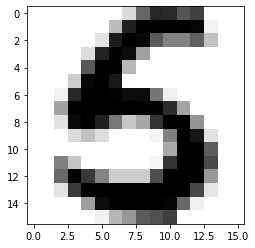

In [3]:
# Graficamos 1 ejemplo de cada imagen en el caso de cada digito
# En este caso del digito 1
# (es necesario indicar vmin y vmax para que matplotlib.pyplot sepa que el minimo es 0 y el maximo 1)
# (solo imagenes en escala de grises)

plt.imshow(Digit1[5].reshape(16,16),vmin=0,vmax=1,cmap='gray')

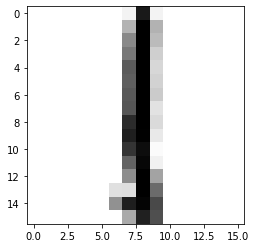

In [4]:
# Graficamos 1 ejemplo de cada imagen en el caso de cada digito
# En este caso del digito 2 del set de entrenamiento
# (es necesario indicar vmin y vmax para que matplotlib.pyplot sepa que el minimo es 0 y el maximo 1)
# (solo imagenes en escala de grises)

plt.imshow(Digit2[1].reshape(16,16),vmin=0,vmax=1,cmap='gray')


In [24]:
# Informacion de los nuevos datos de entrenamiento generados
# los nuevos datos solo contienen ejemplos de los digitos escogidos
# los nuevos datos están en funcion de las 2 nuevas y unicas caracteristicas de entrada x1 y x2

print("Número de ejemplos:"+ str(X_new.shape[0]))
print("Número de caracteristicas:"+ str(X_new.shape[1]))

# Información de las nuevas etiquetas del set de entrenamiento

print("Número de ejemplos con 5: "+str(len(y_train_Digit1)))
print("Número de ejemplos con 1: "+str(len(y_train_Digit2)))


Número de ejemplos:1561
Número de caracteristicas:2
Número de ejemplos con 5: 556
Número de ejemplos con 1: 1005


In [23]:
print("forma del nuevo conjunto de entrenamiento en X:",X_new.shape)
print("forma del nuevo conjunto de entrenamiento en Y:",y_new.shape)


forma del nuevo conjunto de entrenamiento en X: (1561, 2)
forma del nuevo conjunto de entrenamiento en Y: (1561,)


In [5]:
# Preparando datos del set de prueba/ test, perteneciente a únicamente 2 digitos
# Como mi CI termina en 5, el primer digito será 5, el segundo será un 1
# Extraer las imagenes de ambos digitos del set de entrenamiento, denominadas X_test_Digit1 y X_test_Digit2

X_test_Digit1 = X_test[y_test == 5]
y_test_Digit1 = np.ones(len(X_test_Digit1))
X_test_Digit2 = X_test[y_test == 1]
y_test_Digit2 = -np.ones(len(X_test_Digit2))

# apilamos los datos de las matrices de los 2 digitos, de forma vertical una sobre la otra
# realizamos esto tanto para los datos de test en x, como pára las etiquetas de test y

X_test_new = np.r_[X_test_Digit1, X_test_Digit2]
y_test_new = np.r_[y_test_Digit1, y_test_Digit2]


# randomizamos ambas matrices por medio de la generacion de números aleatorios 
# cada número generado se le pasara como lista de indices para generar los datos finales de 
# prueba/ test y sus respectivas etiquetas, mismas que tendran ejemplos del digito 1 y 2 
# de forma un poco mas distribuida que antes.

R = np.random.randint(X_test_new.shape[0], size = (X_test_new.shape[0],))

X_test_new = X_test_new[R]
y_test_new = y_test_new[R]

# calculamos la intensidad de la imagen promedio para cada imagen del set y de igual forma para cada digito  
avg_int_test = [intensity(im) for im in X_test_new]

# Calculamos la simetria promedio para cada imagen y para cada digito

test_symm = [symmetry(im) for im in X_test_new]

# generamos el nuevo conjunto de prueba en X

X_test_final = np.c_[avg_int_test, test_symm]



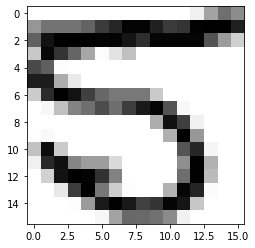

In [6]:
# Graficamos 1 ejemplo de cada imagen en el caso de cada digito
# (es necesario indicar vmin y vmax para que pyplot sepa que el minimo es 0 y el maximo 1)
# (solo imagenes escala de grises)
plt.imshow(X_test_Digit1[5].reshape(16,16),vmin=0,vmax=1,cmap='gray')

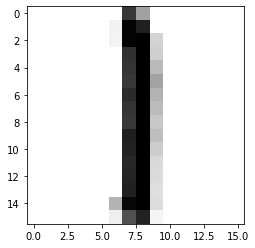

In [7]:
# Graficamos 1 ejemplo de cada imagen en el caso de cada digito
# (es necesario indicar vmin y vmax para que pyplot sepa que el minimo es 0 y el maximo 1)
# (solo imagenes escala de grises)
plt.imshow(X_test_Digit2[1].reshape(16,16),vmin=0,vmax=1,cmap='gray')

In [25]:
# Informacion de los nuevos datos de prueba/ test
# los nuevos datos solo contienen ejemplos de los digitos escogidos
# los nuevos datos están en funcion de las 2 nuevas y unicas caracteristicas de entrada x1 y x2

print("Número de ejemplos:"+ str(X_test_final.shape[0]))
print("Número de caracteristicas:"+ str(X_test_final.shape[1]))

# Información de las nuevas etiquetas del set de entrenamiento

print("Número de ejemplos con 5: "+str(len(y_test_Digit1)))
print("Número de ejemplos con 1: "+str(len(y_test_Digit2)))

Número de ejemplos:424
Número de caracteristicas:2
Número de ejemplos con 5: 160
Número de ejemplos con 1: 264


In [26]:
print("forma del nuevo conjunto de prueba en X:",X_test_final.shape)
print("forma del nuevo conjunto de prueba en Y:",y_test_new.shape)


forma del nuevo conjunto de prueba en X: (424, 2)
forma del nuevo conjunto de prueba en Y: (424,)


In [8]:
##########################################################
# Algoritmo del perceptron para N iteraciones
###########################################################

# función que ejecuta el algoritmo del perceptron



def perceptron(input_data,y,input_data_test,y_test,max_iter):
    # creamos una nueva matriz de datos de entrada, denominada como data
    # donde incluimos un vector de 1's en el set de datos, tanto en el de train como en el de test
    data = np.c_[np.ones((input_data.shape[0],1)), input_data]  #https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html
    data_test = np.c_[np.ones((input_data_test.shape[0],1)), input_data_test]
    # generamos el vector de pesos inicial w de forma aleatoria
    w = np.random.random(data.shape[1]).reshape(-1,1)   
    # current o la predicción (h(x) o g) en base a los datos de entrenamiento y al vector w inicial
    current = np.sign(data @ w)
    # f en este caso, sera y o las etiquetas para el set de entrenamiento
    f = y.reshape(-1,1)
    # de igual forma y_test sera para el set de test
    y_test =y_test.reshape(-1,1)
    # comparamos f real vs la prediccion de f=sign(WXn)
    difference = (f != current)
    # contador de ejemplos no clasificados correctamente
    t = 0
    Ein = []
    Eout = []
      
   # iteracion de entrenamiento seteado para un número maximo de iteraciones  
    for iteration in range(max_iter):
        for i in range(len(f)): 
            # para cada ejemplo ver si es verdad que la predicción difiere de f
            if difference[i]:
                # si es el caso actualizamos los pesos
                w[0]+=f[i]*data[i][0]
                w[1]+=f[i]*data[i][1]
                w[2]+=f[i]*data[i][2]
                
                # contamos 1 a la cantidad de ejemplos que no se logro clasificar de forma correcta
                t+=1
        # al terminar de recorrer todos los ejemplos, recalculamos la prediccion y la diferencia        
        current = np.sign(data @ w)
        difference = (f != current)
        # almacenamos el error de entrenamiento, el total por iteracion
        # el error es la cantidad de ejemplos incorrectos entre la cantidad de ejemplos totales
        Ein.append((t/len(f))*100)
        # reseteamos el contador
        t=0
    # al terminar las iteraciones    
    # ponemos el error en valores porcentuales    
    
    # Continuando el algoritmo para el caso del set de prueba/test
    # Se partira del vector de pesos w que resulto del entrenamiento en la ultima iteracion
    # el algoritmo es el mismo, solo cambiando de set de datos
    
        prediction_test = np.sign(data_test @ w)    
        difference_test=(y_test != prediction_test)
          
        for i in range(len(y_test)):
            if difference_test[i]:
                t+=1
       
        Eout.append((t/len(y_test))*100)
        t=0
    # De igual forma se lo muestra como valores porcentuales
     
    
    return Ein,Eout,w


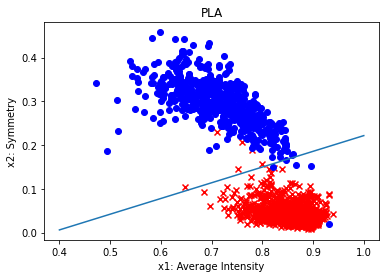

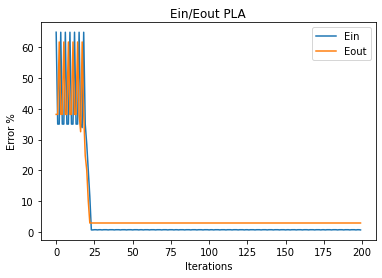

In [33]:
Ein,Eout, weight = perceptron(X_new, y_new,X_test_final,y_test_new, 200)
#Obteniendo la informacion necesaria del perceptron, graficamos los puntos y la recta del modelo
# x_line sera el eje x en el grafico
x_line = np.linspace(0.4, 1, 100)
# dibujamos el espacio de puntos donde el primer digito es azul y rojo el segundo
# el grafico esta en funcion de la intensidad media vs la simetria de cada imagen
plt.scatter(avg_intensity_Digit2, symm_Digit2, marker = 'x', color = 'red')
plt.scatter(avg_intensity_Digit1, symm_Digit1, marker='o', color = 'blue')
# Dibujamos la linea en funcion al vector de pesos weight conseguido
plt.plot(x_line, line(weight))
plt.title('PLA')
plt.xlabel('x1: Average Intensity')
plt.ylabel('x2: Symmetry')
plt.show()


# Graficamos los errores Ein y Eout
  
plt.title('Ein/Eout PLA')
plt.xlabel('Iterations')
plt.ylabel('Error %')
plt.plot(Ein, label='Ein')
plt.plot(Eout, label = 'Eout')
plt.legend()
plt.show()



In [10]:
# Error minimo con el vector de pesos w conseguido y con los datos de test o prueba
min(Ein)

0.5765534913516976

In [11]:
# Error minimo con el vector de pesos w conseguido y con los datos de test o prueba
min(Eout)

2.8301886792452833

In [12]:
weight

array([[ 264.69118408],
       [-688.14799261],
       [1916.24433531]])

In [13]:
def pocket(input_data,y,input_data_test,y_test,max_iter,w=None):    
    data = np.c_[np.ones((input_data.shape[0],1)), input_data]  #https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html
    data_test = np.c_[np.ones((input_data_test.shape[0],1)), input_data_test]
    if w is None:        
        w = np.random.random(data.shape[1]).reshape(-1,1)    
    current = np.sign(data @ w)
    f = y.reshape(-1,1)
    y_test =y_test.reshape(-1,1)
    difference = (f != current)
    t = 0
    Ein = [2]
    Eout = [2]
    
    e=0
    for iteration in range(max_iter):
        for i in range(len(f)):
            if difference[i]:
                w[0]+=f[i]*data[i][0]
                w[1]+=f[i]*data[i][1]
                w[2]+=f[i]*data[i][2]
                t+=1
        current = np.sign(data @ w)
        difference = (f != current)
        # si el error en la presente iteracion es menor al de la anterior
        # guardamos el vector de pesos y su error
        if t/len(f) < Ein[-1]:
            e=t/len(f)
            wf=w.copy()
        # en caso contrario no actualizamos el error, ni guardamos nada   
          
        Ein.append(e)
        t=0
    
    # al terminar las iteraciones, realizamos el procedimiento para test
    # pero partiendo del mejor resultado wf, solo la primera vez
    
        prediction_test = np.sign(data_test @ w)    
        difference_test=(y_test != prediction_test )
          
        for i in range(len(y_test)):
            if difference_test[i]:
                t+=1
        if t/len(y_test) < Eout[-1]:
            e=t/len(y_test)
            wf=w.copy()     
            
        Eout.append(e)
        t=0    
    Ein=[v*100 for v in Ein]
    Eout=[v*100 for v in Eout]
    return Ein,Eout,wf



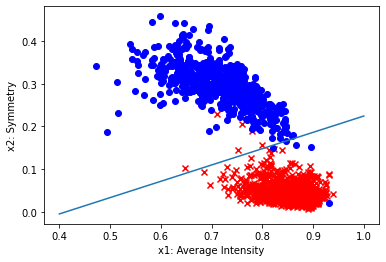

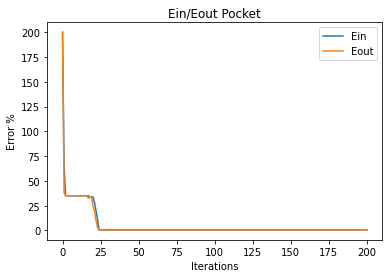

In [34]:
#Using pocket algorithm
Ein, Eout,w = pocket(X_new, y_new,X_test_final,y_test_new, 200)

#Ploting
plt.scatter(avg_intensity_Digit2, symm_Digit2, marker = 'x', color = 'red')
plt.scatter(avg_intensity_Digit1, symm_Digit1, marker='o', color = 'blue')
plt.plot(x_line, line(w))
plt.xlabel('x1: Average Intensity')
plt.ylabel('x2: Symmetry')
plt.show()


#Plot Ein and Eout 
plt.title('Ein/Eout Pocket')
plt.xlabel('Iterations')
plt.ylabel('Error %')
plt.plot(Ein, label='Ein')
plt.plot(Eout, label = 'Eout')
plt.legend()
plt.show()



In [35]:
# Error minimo con el vector de pesos w conseguido y con los datos de entrenamiento
min(Ein)

0.5765534913516976

In [36]:
# Error minimo con el vector de pesos w conseguido y con los datos de test o prueba
min(Eout)

0.5765534913516976

In [19]:
# Linear Regression
# importamos el modelo de regresion lineal de sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def lin(input_data,y,input_data_test,y_test,):
    # realizamos el mismo procedimiento anterior de añadir un vector de 1's a los datos
    data = np.c_[np.ones((input_data.shape[0],1)), input_data]  #https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html
    data_test = np.c_[np.ones((input_data_test.shape[0],1)), input_data_test]
    
    
    # Adaptamos los vectores que contienen a las etiquetas de train y test para ser de tipo columna
    f = y.reshape(-1,1)
    y_test =y_test.reshape(-1,1)
    # creamos un modelo lineal
    modeloLinear = LinearRegression()
    # aplicamos el set de datos de train al modelo
    modeloLinear.fit(X = input_data, y = y)
    # creamos w con los pesos obtenidos en el modelo lineal entrenado
    w=np.array([modeloLinear.intercept_,modeloLinear.coef_[0],modeloLinear.coef_[1]]).reshape(-1,1)
    # obtenemos h o la prediccion del modelo para el conjunto train y test, con el w conseguido
    # para lo cual aplicamos sign(wT.x)
    prediction_train=np.sign(data @ w)
    prediction_test=np.sign(data_test @ w)
    # calculamos el error contando las clases no acertadas con relacion a las etiquetas de cada conjunto
    NMissClass=0
    difference = (f != prediction_train)
    for i in range(len(f)):
        if difference[i]:
            NMissClass+=1
    # Calculamos el error porcentual de Ein
    Ein=(NMissClass/len(f))*100
    # Hacemos lo mismo para test y Eout
    NMissClass=0
    difference_test = (y_test != prediction_test)
    for i in range(len(y_test)):
        if difference_test[i]:
            NMissClass+=1
    Eout=(NMissClass/len(y_test))*100
    
    NMissClass=0
    
    
    return Ein,Eout,w


Ein LIN: 0.4484304932735426
Eout LIN: 2.5943396226415096


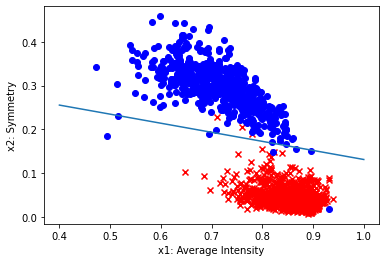

Ein Pocket: 0.4484304932735426
Eout Pocket: 0.5765534913516976


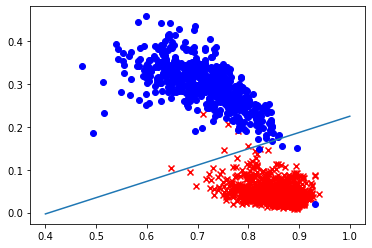

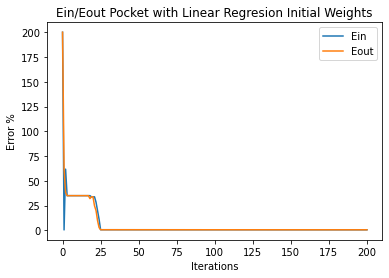

In [37]:
## Regresion lineal VS pocket algorithm

# REGRESION LINEAL

Ein, Eout,w = lin(X_new, y_new,X_test_final,y_test_new)
print('Ein LIN:',Ein)
print('Eout LIN:',Eout)

plt.scatter(avg_intensity_Digit2, symm_Digit2, marker = 'x', color = 'red')
plt.scatter(avg_intensity_Digit1, symm_Digit1, marker='o', color = 'blue')
plt.plot(x_line, line(w))
plt.xlabel('x1: Average Intensity')
plt.ylabel('x2: Symmetry')
plt.show()

## Algoritmo POCKET 

Ein, Eout,w = pocket(X_new, y_new,X_test_final,y_test_new, 200,w)

print('Ein Pocket:',min(Ein))
print('Eout Pocket:',min(Eout))


plt.scatter(avg_intensity_Digit2, symm_Digit2, marker = 'x', color = 'red')
plt.scatter(avg_intensity_Digit1, symm_Digit1, marker='o', color = 'blue')
plt.plot(x_line, line(w))
plt.show()

#Plot Ein and Eout 
plt.title('Ein/Eout Pocket with Linear Regresion Initial Weights')
plt.xlabel('Iterations')
plt.ylabel('Error %')
plt.plot(Ein, label='Ein')
plt.plot(Eout, label = 'Eout')
plt.legend()
plt.show()
